# Time Series Forecasting

## Problem:  

<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#0e92ea"> ROSE Wine:

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

Data set for the Problem: Rose.csv

### Importing all libraries and basic packages

In [587]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pylab import rcParams
from sklearn.metrics import r2_score
from   math              import sqrt
from   sklearn.metrics   import mean_squared_error
from   sklearn import metrics

from statsmodels.distributions.empirical_distribution import ECDF

import warnings
warnings.filterwarnings("ignore")

## Question 1 : Read the data as an appropriate Time Series data and plot the data. 

<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#0e92ea"> Answer 1 :

In [588]:
df = pd.read_csv("Rose.csv", parse_dates = True, index_col = 'YearMonth')

In [589]:
df

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0


In [590]:
df.isnull().sum()

Rose    2
dtype: int64

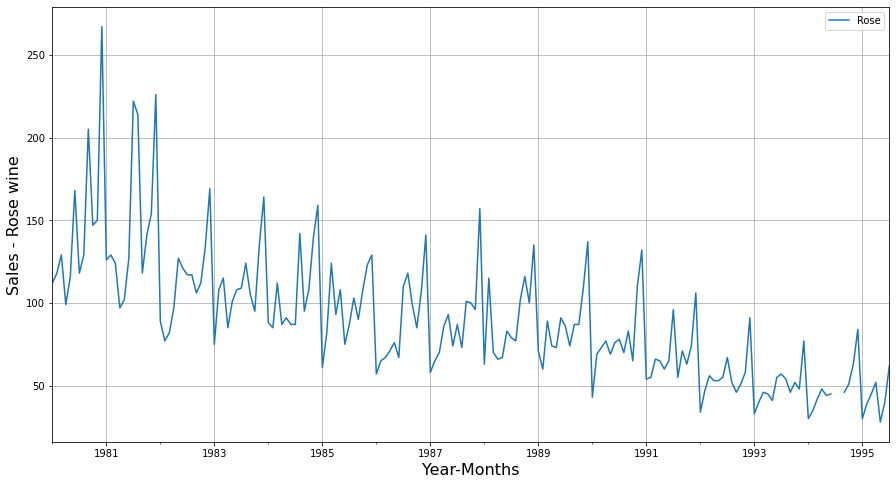

In [591]:
axis = df.plot(label='Rose', figsize=(15, 8))
rcParams['figure.figsize'] = 15,8
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales - Rose wine')
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.legend(loc='best')
plt.plot(df)
plt.grid()

### There is some seasonality in the wine sales. Moreover, the trend is downward.

## Question 2: Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#0e92ea"> Answer 2 :

In [592]:
df.isnull().sum()

Rose    2
dtype: int64

In [593]:
df[df['Rose'].isnull()]

,Rose
YearMonth,
1994-07-01,NaN
1994-08-01,NaN


#### July and August of 1994 has missing value.

### Yearly Sales

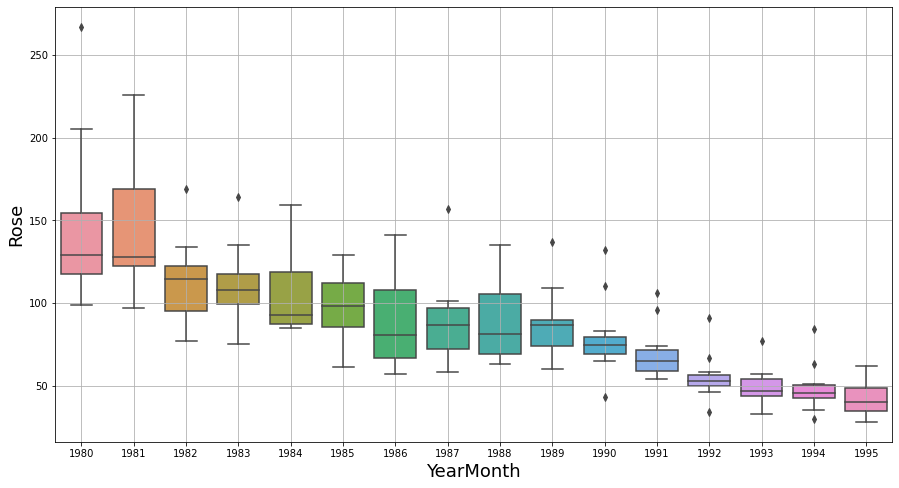

In [594]:
sns.boxplot(x = df.index.year,y = df['Rose'])
plt.grid();

### Monthly Sales 

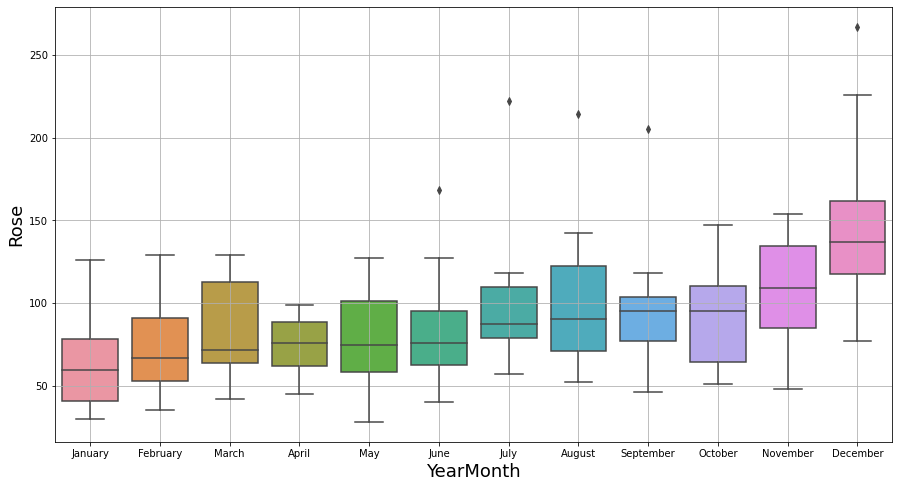

In [595]:
sns.boxplot(x = df.index.month_name(),y = df['Rose'])
plt.grid();

### Time series monthplot to understand the spread of Sales across different years and within different months across years.

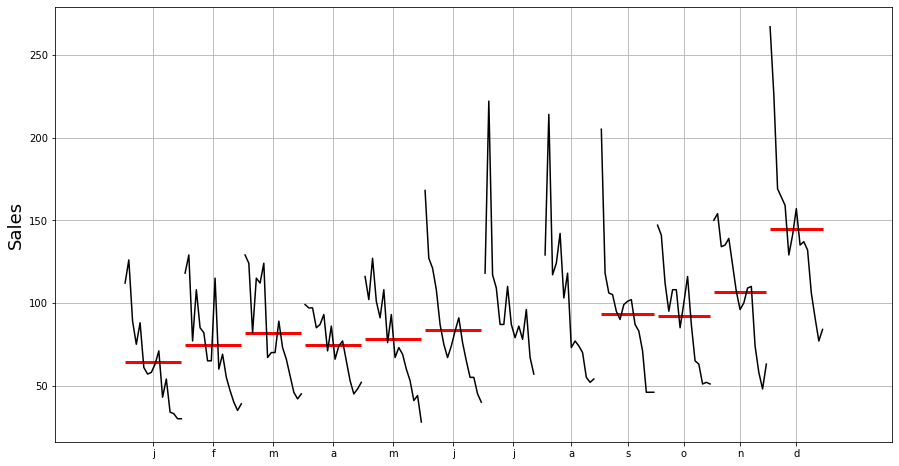

In [596]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Rose'],  ylabel='Sales')
plt.grid();

### Plot of monthly Sales across years.

In [597]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,99.0,129.0,267.0,118.0,112.0,118.0,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.0,226.0,129.0,126.0,222.0,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.0,169.0,77.0,89.0,117.0,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.0,164.0,108.0,75.0,109.0,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.0,159.0,85.0,88.0,87.0,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.0,129.0,82.0,61.0,87.0,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.0,141.0,65.0,57.0,110.0,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.0,157.0,65.0,58.0,87.0,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.0,135.0,115.0,63.0,79.0,83.0,70.0,67.0,100.0,116.0,102.0


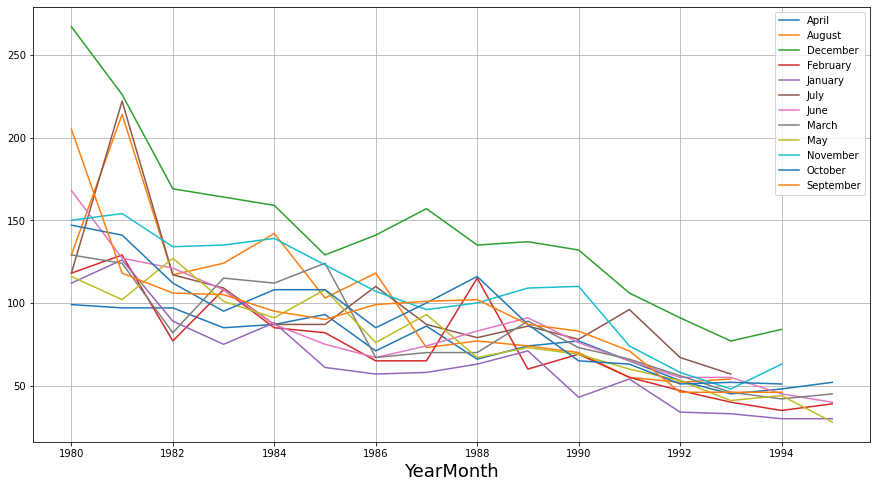

In [598]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend();

### Plotting the Empirical Cumulative Distribution.

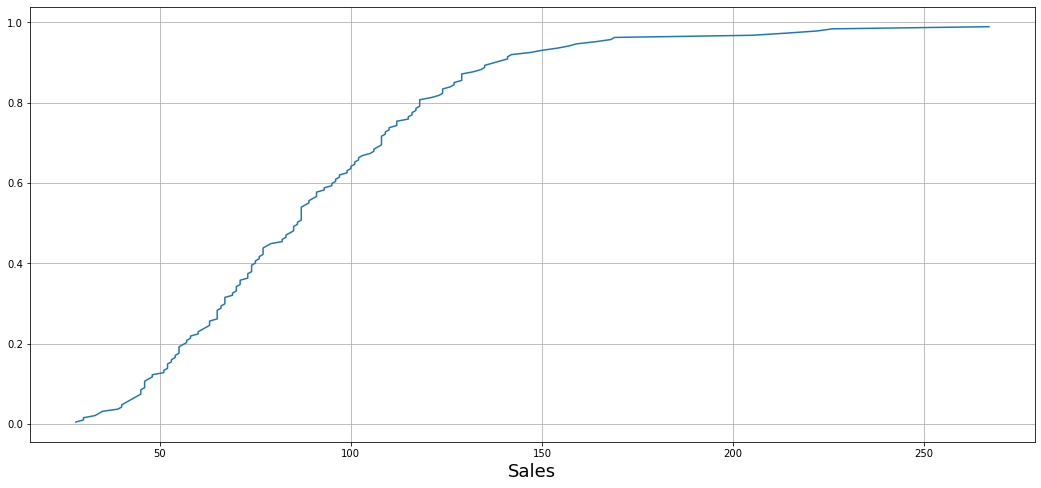

In [599]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

#### This particular graph tells us what percentage of data points refer to what number of Sales.


### Plotting the average Sales per month and the month on month percentage change of Wine Sales.

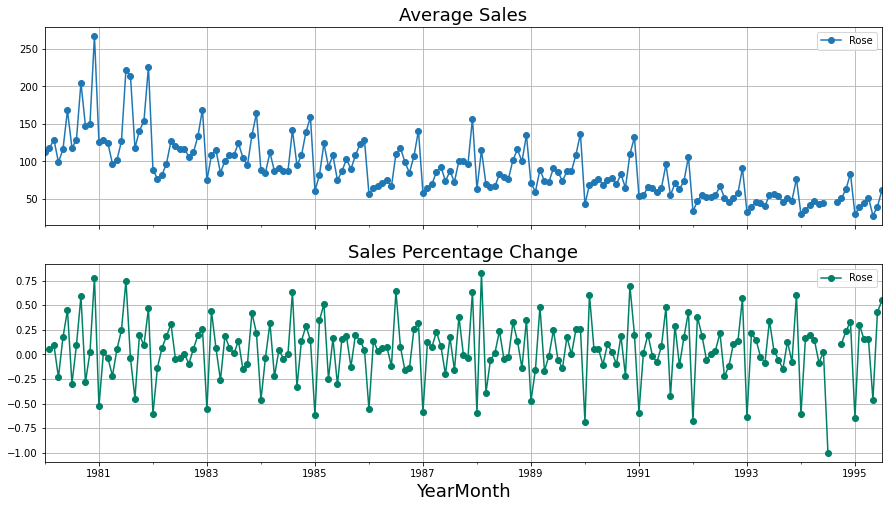

In [600]:
# group by date and get average Sales, and precent change
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percentage Change",grid=True)

#### The above two graphs tells us the Average 'Sales' and the Percentage change of 'Sales' with respect to the time.

### Before decomposition we have to impute the null values in the series. Since the data set has seasonality, it is always good to have moving averages to fill the missing value. In our present case, we will try with 4 months moving averages.

In [601]:
df=df.fillna(df.rolling(4,min_periods=1).mean())

In [602]:
df.isnull().sum()

Rose    0
dtype: int64

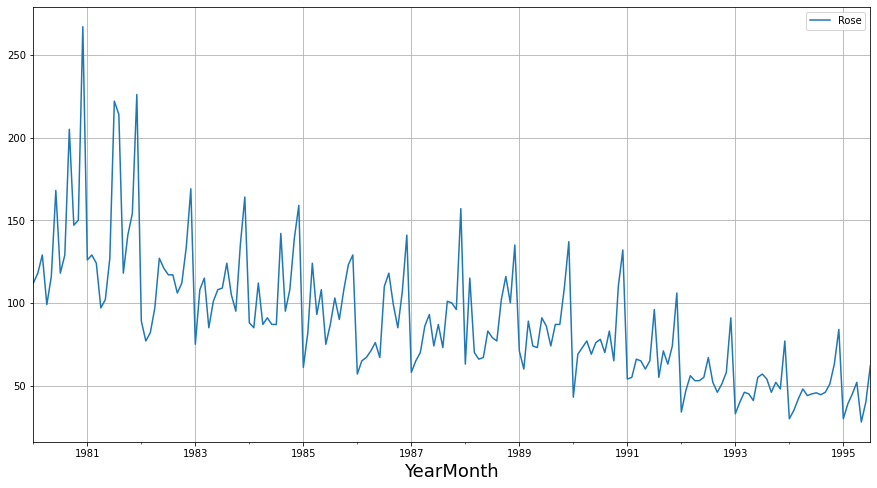

In [603]:
rcParams['figure.figsize'] = 15,8
df.plot()
plt.grid()

## Decomposing the Time Series and plot the different components

### Additive

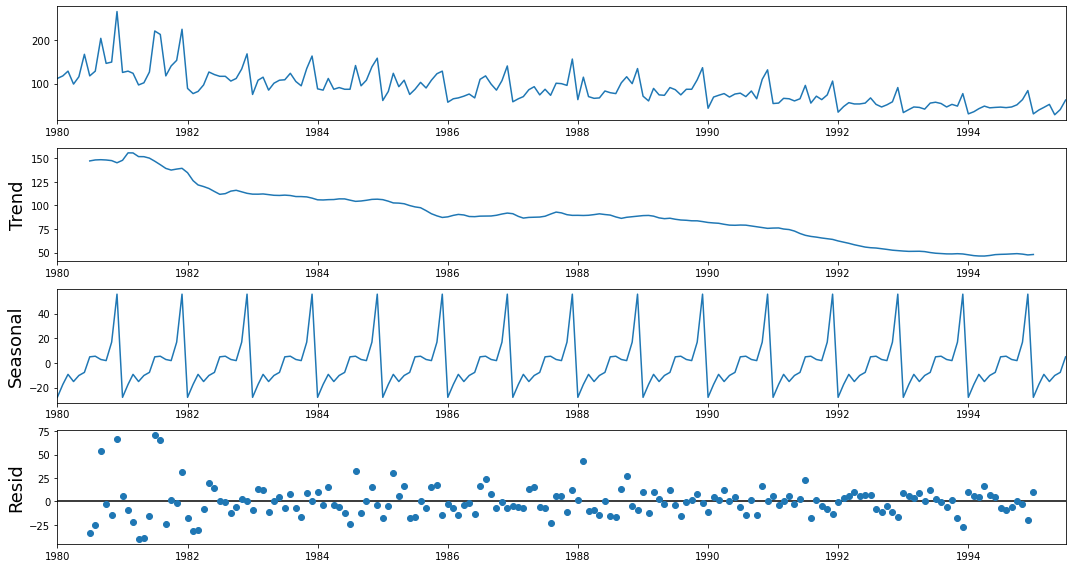

In [604]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

### Multiplicative

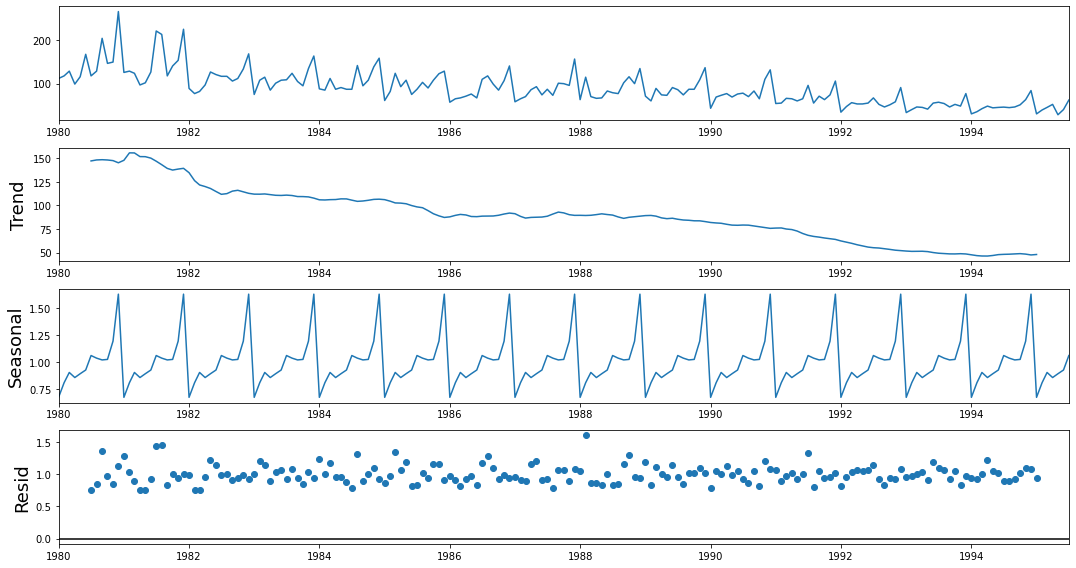

In [605]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

## Question 3: Split the data into training and test. The test data should start in 1991.

<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#0e92ea"> Answer 3 :

In [606]:
train=df[df.index.year <1991]
test=df[df.index.year >=1991]

In [607]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [608]:
train.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [609]:
test.head()

,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


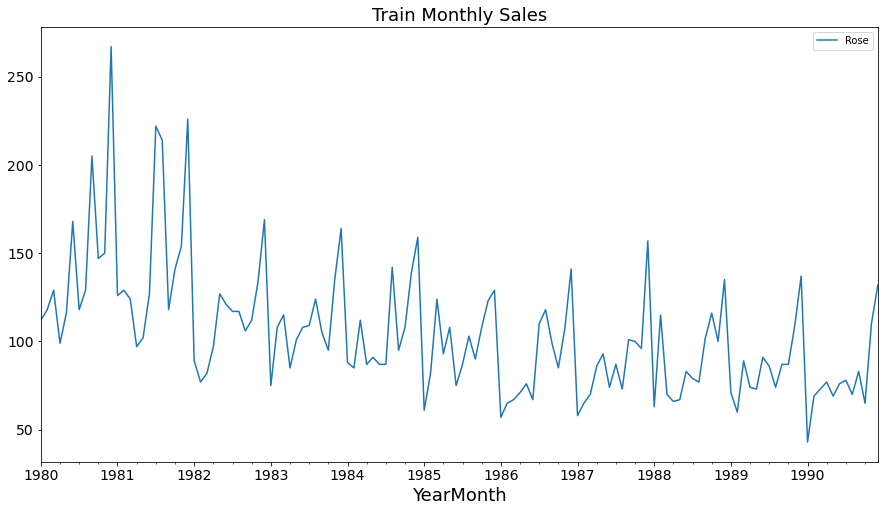

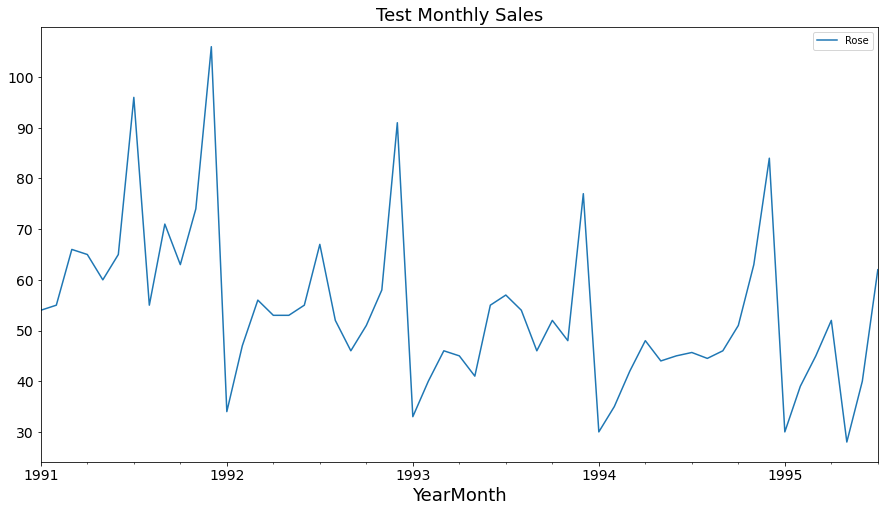

In [610]:
train.plot(figsize=(15,8), title= 'Train Monthly Sales', fontsize=14)
test.plot(figsize=(15,8), title= 'Test Monthly Sales', fontsize=14)

## Question 4: Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models should also be built on the training data and check the performance on the test data using RMSE.

<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#0e92ea"> Answer 4 :

## Model 1: Simple Exponential Smoothing

In [611]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [612]:
SES = SimpleExpSmoothing(train['Rose'])

In [613]:
model_fit = SES.fit(optimized = True,use_brute=True)

print('Smoothing Level', np.round(model_fit.params['smoothing_level'], 4))
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')

Smoothing Level 0.0987
Initial Level 134.3869



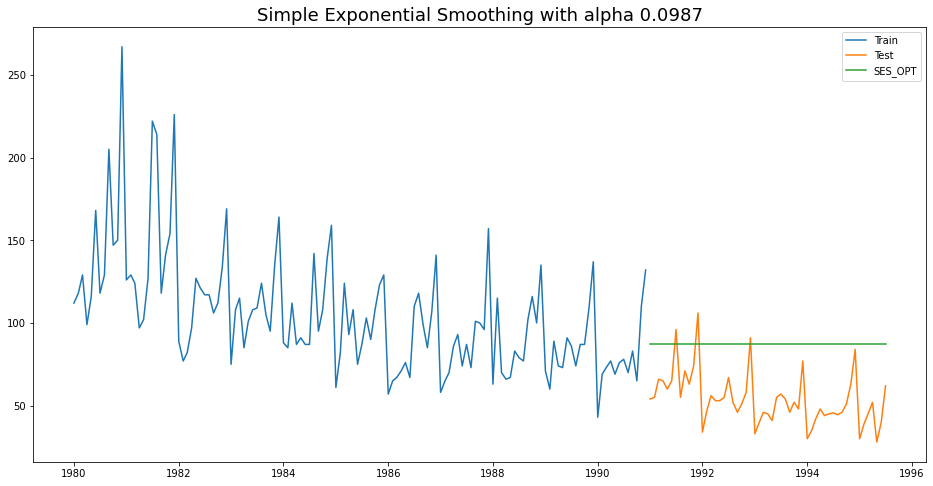

In [614]:
y_hat_avg = test.copy()
y_hat_avg['SES']     = model_fit.forecast(len(test['Rose']))
alpha_value          = np.round(model_fit.params['smoothing_level'], 4)


plt.figure(figsize=(16,8))
plt.plot(train.index, train['Rose'], label = 'Train')
plt.plot(test.index, test['Rose'],   label = 'Test')
plt.plot(test.index, y_hat_avg.SES,   label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

In [615]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [616]:
rmse             =  np.sqrt(mean_squared_error(test['Rose'], y_hat_avg.SES))
mape             =  MAPE(test['Rose'], y_hat_avg.SES)

print("For alpha = %1.2f,  RMSE is %3.4f     MAPE is %3.2f" %(alpha_value, rmse, mape))

For alpha = 0.10,  RMSE is 36.8136     MAPE is 63.93


In [617]:
resultsDf = pd.DataFrame({'Method':['Simple Exponential Smoothing (alpha = 0.1)'], 'RMSE': [rmse], 'MAPE' : [mape]})
resultsDf

,Method,RMSE,MAPE
0,Simple Exponential Smoothing (alpha = 0.1),36.813611,63.93


## Simple Exponential Smoothing - Optimized Alpha

In [618]:
model_SES = SimpleExpSmoothing(train['Rose'])

In [619]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Test RMSE


In [620]:
SES_train = train.copy()
SES_test = test.copy()

In [621]:
for i in np.arange(0.00,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model2_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_model = resultsDf_model.append({'Alpha Values':i
                                              ,'Test RMSE':rmse_model2_test_i}, ignore_index=True)

In [622]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Test RMSE
7,0.07,36.453145
8,0.08,36.480338
6,0.06,36.597840
9,0.09,36.621489
10,0.10,36.845400
...,...,...
95,0.95,78.549262
96,0.96,78.803446
97,0.97,79.049245
98,0.98,79.286559


### It is observed that the model is best fit when Alpha is 0.07.

## Model 2: Holt's Method (Double Exponential Smoothing)

In [623]:
import statsmodels.api as sm

y_hat_avg = test.copy()

model_fit = Holt(np.asarray(train['Rose'])).fit(optimized = True,use_brute=True)
y_hat_avg['Holt_linear'] = model_fit.forecast(len(test))

In [624]:
print('')

alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)

print('Smoothing Level', alpha_value )
print('Smoothing Slope', beta_value)
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


Smoothing Level 0.1579
Smoothing Slope 0.1579
Initial Level 112.0



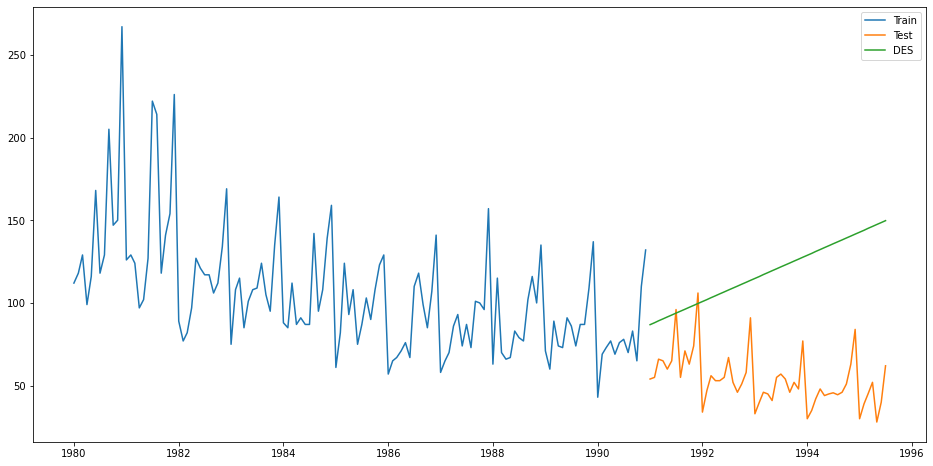

In [625]:
plt.figure(figsize=(16,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='DES')
plt.legend(loc='best')
plt.show()

In [626]:
rmse             =  np.sqrt(mean_squared_error(test['Rose'], y_hat_avg['Holt_linear']))
mape             =  MAPE(test['Rose'], y_hat_avg['Holt_linear'])

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))

For alpha = 0.16,  RMSE is 70.5923 MAPE is 120.31


In [627]:
tempResultsDf = pd.DataFrame({'Method': 'Double Exponential Smoothing (alpha = 0.16)', 'RMSE': [rmse], 'MAPE' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                                        Method       RMSE    MAPE
0  Simple Exponential Smoothing (alpha = 0.1)   36.813611  63.93 
0  Double Exponential Smoothing (alpha = 0.16)  70.592305  120.31


## Double Exponential Smoothing - Optimized Alpha, Beta

In [628]:
DES_train = train.copy()
DES_test = test.copy()

In [629]:
model_DES = Holt(DES_train['Rose'])

In [630]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Test RMSE


In [631]:
for i in np.arange(0.05,1.05,0.05):
    for j in np.arange(0.05,1.05,0.05):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        
        rmse_model4_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j
                                          ,'Test RMSE':rmse_model4_test}, ignore_index=True)

In [632]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Test RMSE
6,0.05,0.35,16.337739
5,0.05,0.30,18.634416
2,0.05,0.15,23.731852
0,0.05,0.05,31.544803
7,0.05,0.40,31.597247
...,...,...,...
319,0.80,1.00,1095.133023
239,0.60,1.00,1102.106589
299,0.75,1.00,1117.921779
259,0.65,1.00,1119.829085


In [633]:
model_DES_alpha_i_j = model_DES.fit(smoothing_level=0.05,smoothing_slope=0.35,optimized=False,use_brute=True)

In [634]:
predict = DES_test
predict['DES'] = model_DES_alpha_i_j.forecast(len(DES_test))

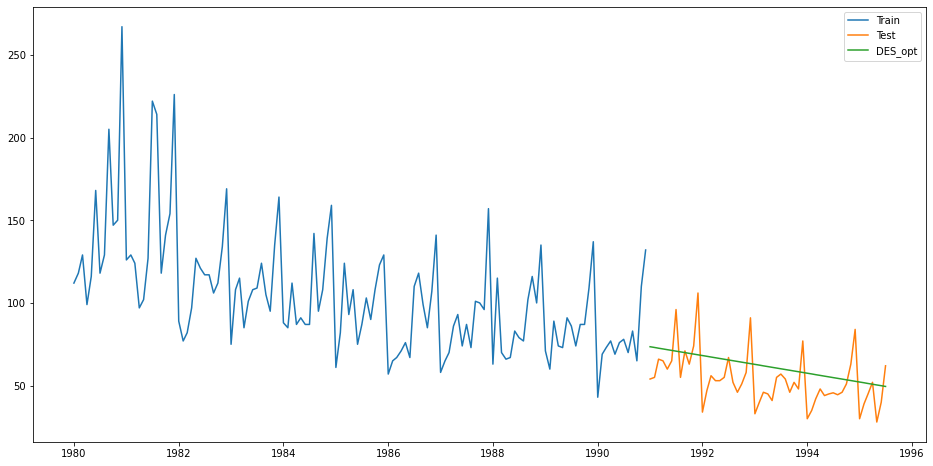

In [635]:
plt.figure(figsize=(16,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(predict['DES'], label='DES_opt')
plt.legend(loc='best')
plt.show()

In [636]:
rmse             =  np.sqrt(mean_squared_error(DES_test['Rose'], predict['DES']))
mape             =  MAPE(DES_test['Rose'], predict['DES'])

print("RMSE is %3.4f MAPE is %3.2f" %(rmse, mape))

RMSE is 16.3377 MAPE is 25.86


In [637]:
tempResultsDf = pd.DataFrame({'Method': 'Double Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.35 )', 'RMSE': [rmse], 'MAPE' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                                                                  Method  \
0  Simple Exponential Smoothing (alpha = 0.1)                              
0  Double Exponential Smoothing (alpha = 0.16)                             
0  Double Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.35 )   

        RMSE    MAPE  
0  36.813611  63.93   
0  70.592305  120.31  
0  16.337739  25.86   


## Method 3: Holt-Winters Method - Triple Exponential - Multiplicative Model

In [719]:
TES_train = train.copy()
TES_test = test.copy()

In [720]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE


In [721]:
model_TES = ExponentialSmoothing(TES_train['Rose'],seasonal_periods = 12, trend='additive',seasonal='multiplicative')

In [718]:
for i in np.arange(0.05,1.1,0.05):
    for j in np.arange(0.05,1.1,0.05):
        for k in np.arange(0.05,1.1,0.105):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
                
            rmse_model6_test_2 = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
                    
            resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k
                                                  ,'Test RMSE':rmse_model6_test_2}, ignore_index=True)

In [642]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Gamma Values,Test RMSE
72,0.05,0.40,0.260,8.742542e+00
64,0.05,0.35,0.470,9.069367e+00
63,0.05,0.35,0.365,9.282766e+00
55,0.05,0.30,0.575,9.322788e+00
201,0.05,1.05,0.155,9.346694e+00
...,...,...,...,...
2704,0.65,0.95,0.470,4.072886e+06
3493,0.85,0.70,0.365,8.850023e+06
3498,0.85,0.70,0.890,9.756601e+06
4183,1.00,1.00,0.365,1.832748e+07


In [643]:
model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=0.05,smoothing_slope=0.4,smoothing_seasonal=0.26,optimized=False,use_brute=True)

In [644]:
predict_final = TES_test
predict['TES'] = model_TES_alpha_i_j_k.forecast(len(TES_test))

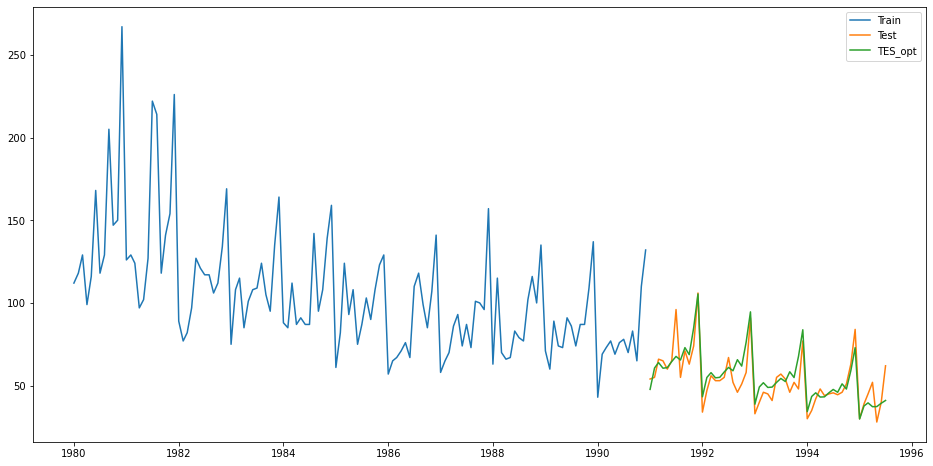

In [645]:
plt.figure(figsize=(16,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(predict['TES'], label='TES_opt')
plt.legend(loc='best')
plt.show()

In [646]:
rmse             =  np.sqrt(mean_squared_error(TES_test['Rose'], predict['TES']))
mape             =  MAPE(TES_test['Rose'], predict['TES'])

print("RMSE is %3.4f MAPE is %3.2f" %( rmse, mape))

RMSE is 8.7425 MAPE is 11.92


In [647]:
tempResultsDf = pd.DataFrame({'Method': 'Triple Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.4, Gamma = 0.26)', 'RMSE': [rmse], 'MAPE' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                                                                              Method  \
0  Simple Exponential Smoothing (alpha = 0.1)                                          
0  Double Exponential Smoothing (alpha = 0.16)                                         
0  Double Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.35 )               
0  Triple Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.4, Gamma = 0.26)   

        RMSE    MAPE  
0  36.813611  63.93   
0  70.592305  120.31  
0  16.337739  25.86   
0  8.742542   11.92   


## Additional Models of forecasting

## Model 4 - Regression On Time

In [648]:
df1=df.copy()

In [649]:
time = [i+1 for i in range(len(df1))]
df1['time'] = time

In [650]:
df1.head(2)

,Rose,time
YearMonth,,
1980-01-01,112.0,1
1980-02-01,118.0,2


In [651]:
train=df1[df1.index.year <1991]
test=df1[df1.index.year >=1991]

In [652]:
x_train = train.drop('Rose',axis=1)
x_test  = test.drop('Rose', axis=1)
y_train = train[['Rose']]
y_test  = test[['Rose']]

In [653]:
from sklearn.linear_model import LinearRegression

In [654]:
lr = LinearRegression()

In [655]:
lr.fit(x_train, y_train)

LinearRegression()

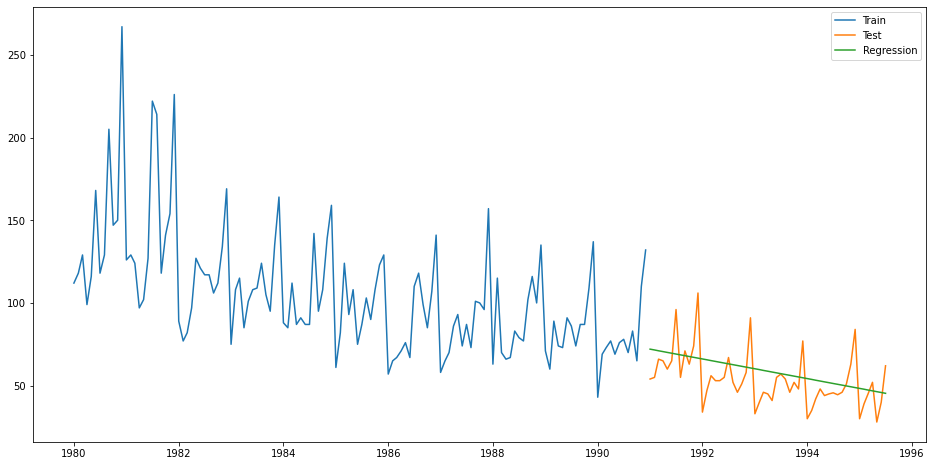

In [656]:
predictions         = lr.predict(x_test)
y_test['RegOnTime'] = predictions

plt.figure(figsize=(16,8))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression')
plt.legend(loc='best')

In [657]:
rmse = sqrt(mean_squared_error(test.Rose, y_test.RegOnTime))
rmse = round(rmse, 3)
mape = MAPE(test.Rose, y_test.RegOnTime)
print("For RegressionOnTime,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For RegressionOnTime,  RMSE is 15.275 MAPE is 22.85


In [658]:
tempResultsDf = pd.DataFrame({'Method':['Regression On Time'], 'RMSE': [rmse], 'MAPE' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf


,Method,RMSE,MAPE
0,Simple Exponential Smoothing (alpha = 0.1),36.813611,63.93
0,Double Exponential Smoothing (alpha = 0.16),70.592305,120.31
0,"Double Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.35 )",16.337739,25.86
0,"Triple Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.4, Gamma = 0.26)",8.742542,11.92
0,Regression On Time,15.275000,22.85


## Model 5: Naive Approach: $\hat{y}_{t+1} = y_t$

In [659]:
temp = np.asarray(train.Rose)

In [660]:
y_hat = test.copy()
y_hat['naive'] = temp[len(temp)-1]

Text(0.5, 1.0, 'Naive Forecast')

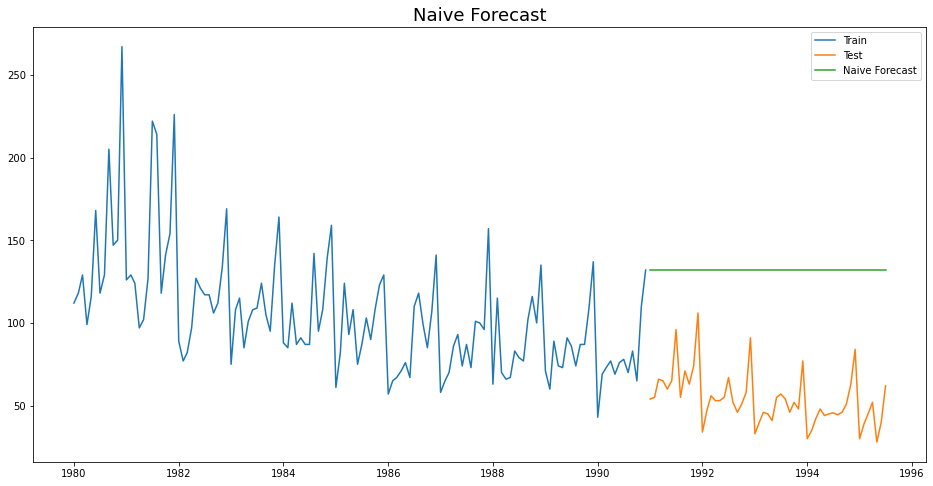

In [661]:
plt.figure(figsize=(16,8))
plt.plot(train.index, train['Rose'], label='Train')
plt.plot(test.index,test['Rose'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [662]:
rmse = sqrt(mean_squared_error(test.Rose, y_hat.naive))
rmse = round(rmse, 3)
mape = MAPE(test.Rose, y_hat.naive)
print("For Naive model,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For Naive model,  RMSE is 79.735 MAPE is 145.17


In [663]:
tempResultsDf = pd.DataFrame({'Method':['Naive model'], 'RMSE': [rmse], 'MAPE' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,RMSE,MAPE
0,Simple Exponential Smoothing (alpha = 0.1),36.813611,63.93
0,Double Exponential Smoothing (alpha = 0.16),70.592305,120.31
0,"Double Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.35 )",16.337739,25.86
0,"Triple Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.4, Gamma = 0.26)",8.742542,11.92
0,Regression On Time,15.275000,22.85
0,Naive model,79.735000,145.17


## Model 6: Simple Average

In [664]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Rose'].mean()

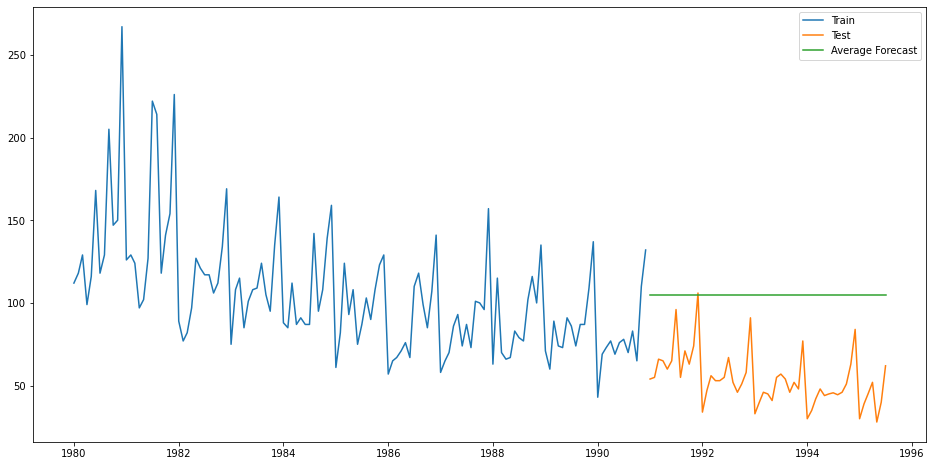

In [665]:
plt.figure(figsize=(16,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

In [666]:
rmse = sqrt(mean_squared_error(test.Rose, y_hat_avg.avg_forecast))
rmse = round(rmse, 3)
mape = MAPE(test.Rose, y_hat_avg.avg_forecast)
print("For Simple Average model,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For Simple Average model,  RMSE is 53.478 MAPE is 94.98


In [667]:
tempResultsDf = pd.DataFrame({'Method':['Simple Average'], 'RMSE': [rmse], 'MAPE' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
pd.set_option('display.max_colwidth', -1)
resultsDf

,Method,RMSE,MAPE
0,Simple Exponential Smoothing (alpha = 0.1),36.813611,63.93
0,Double Exponential Smoothing (alpha = 0.16),70.592305,120.31
0,"Double Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.35 )",16.337739,25.86
0,"Triple Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.4, Gamma = 0.26)",8.742542,11.92
0,Regression On Time,15.275000,22.85
0,Naive model,79.735000,145.17
0,Simple Average,53.478000,94.98


## Model 7: Moving Average (MA)

In [668]:
df_MA = df.copy()

In [669]:
df_MA['moving_avg_4_period']  = df_MA['Rose'].rolling(4).mean()
df_MA['moving_avg_6_period']  = df_MA['Rose'].rolling(6).mean()
df_MA['moving_avg_8_period']  = df_MA['Rose'].rolling(8).mean()
df_MA['moving_avg_12_period'] = df_MA['Rose'].rolling(12).mean()

For Moving Average model, moving_avg_4_period  RMSE is 14.457 MAPE is 19.50
For Moving Average model, moving_avg_6_period  RMSE is 14.569 MAPE is 20.83
For Moving Average model, moving_avg_8_period  RMSE is 14.802 MAPE is 21.02
For Moving Average model, moving_avg_12_period  RMSE is 15.239 MAPE is 22.10


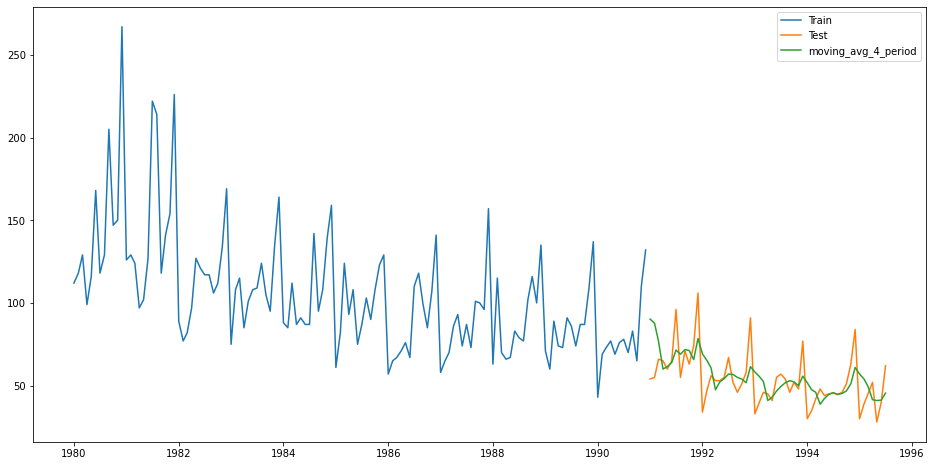

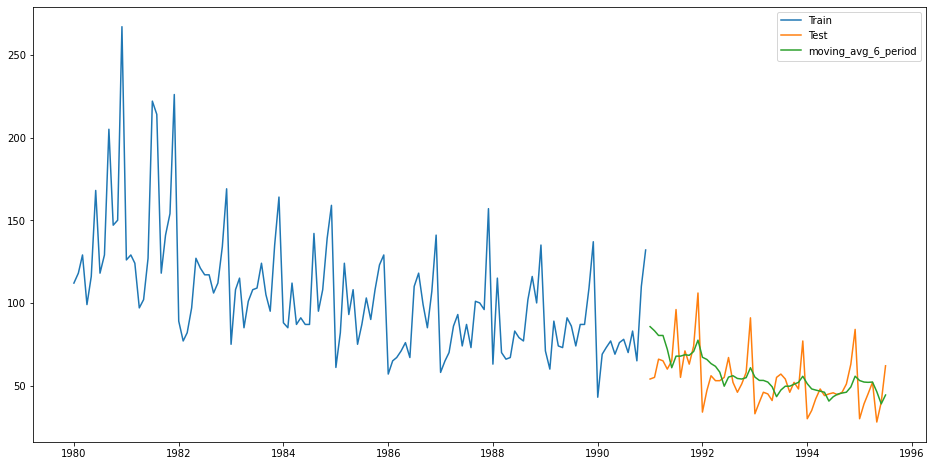

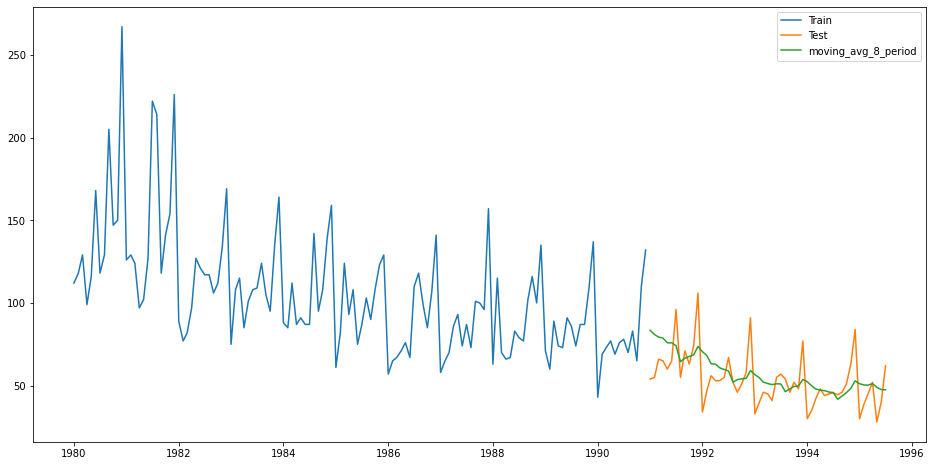

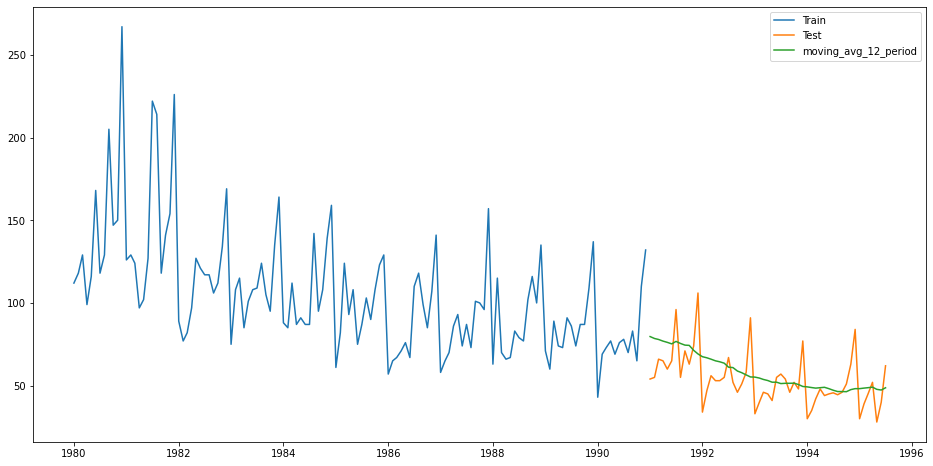

In [670]:
cols = ['moving_avg_4_period','moving_avg_6_period','moving_avg_8_period','moving_avg_12_period']

#Creating train and test set 
train=df_MA[df_MA.index.year <1991]
test=df_MA[df_MA.index.year >=1991]

y_hat_avg = test.copy()

for col_name in cols:
    
    plt.figure(figsize=(16,8))
    plt.plot(train['Rose'], label='Train')
    plt.plot(test['Rose'], label='Test')
    plt.plot(y_hat_avg[col_name], label = col_name)
    plt.legend(loc = 'best')

    rmse = sqrt(mean_squared_error(test.Rose, y_hat_avg[col_name]))
    rmse = round(rmse, 3)
    mape = MAPE(test.Rose, y_hat_avg[col_name])
    print("For Moving Average model, %s  RMSE is %3.3f MAPE is %3.2f" %(col_name, rmse, mape))
    
    #Defining the data frame with the model evaluation parameters

    tempResultsDf = pd.DataFrame({'Method':[col_name], 'RMSE': [rmse], 'MAPE' : [mape]})
    resultsDf = pd.concat([resultsDf, tempResultsDf])

In [671]:
resultsDf


,Method,RMSE,MAPE
0,Simple Exponential Smoothing (alpha = 0.1),36.813611,63.93
0,Double Exponential Smoothing (alpha = 0.16),70.592305,120.31
0,"Double Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.35 )",16.337739,25.86
0,"Triple Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.4, Gamma = 0.26)",8.742542,11.92
0,Regression On Time,15.275000,22.85
0,Naive model,79.735000,145.17
0,Simple Average,53.478000,94.98
0,moving_avg_4_period,14.457000,19.50
0,moving_avg_6_period,14.569000,20.83
0,moving_avg_8_period,14.802000,21.02


#### So,  Optimized Triple Exponential Smoothing model gives the lowest RMSE and MAPE.

## Inference

### It is seen that Optimized Triple Exponential Smoothing model performs better than other models till now. Also, it captures the seasonality well.

## Question 5: Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#0e92ea"> Answer 5 :

##  Check for Stationarity

#### In the present case, Augmented Dickey Fuller (ADF) Test is used to check for stationarity. In ADF test, there are two hypothesis to test. 

#### Null Hypothesis (H0): Time Series is Non Stationary
#### Alternate Hypothesis (H1): Time Series is Stationary

#### The result is interpreted using the p-value from the test. 

#### p-value > 0.05: Fail to reject the null hypothesis (H0), the data is non-stationary.
#### p-value <= 0.05: Reject the null hypothesis (H0), the data is stationary.

In [672]:
train=df[df.index.year <1991]
test=df[df.index.year >=1991]

In [673]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

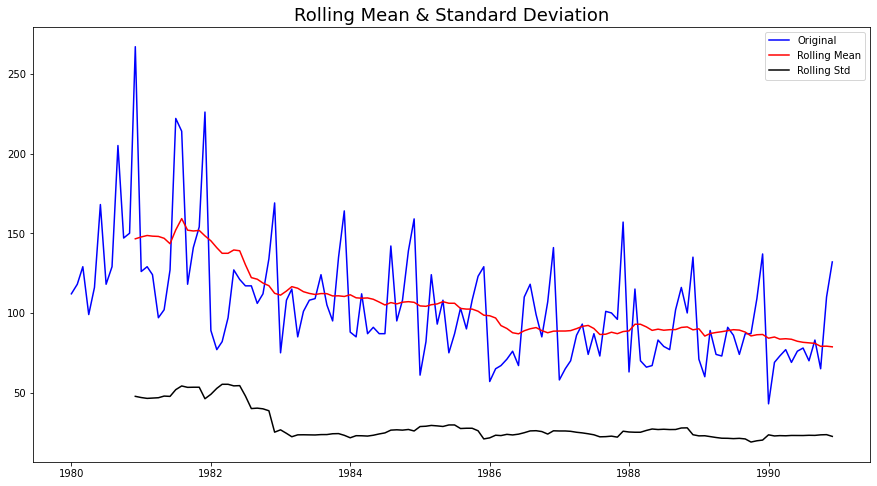

Results of Dickey-Fuller Test:
Test Statistic                -2.164250  
p-value                        0.219476  
#Lags Used                     13.000000 
Number of Observations Used    118.000000
Critical Value (1%)           -3.487022  
Critical Value (5%)           -2.886363  
Critical Value (10%)          -2.580009  
dtype: float64 



In [674]:
test_stationarity(train)

#### At 0.05 alpha, we can say that the time series is non-stationary as the p-value >0.05 Hence, differentiation is required.

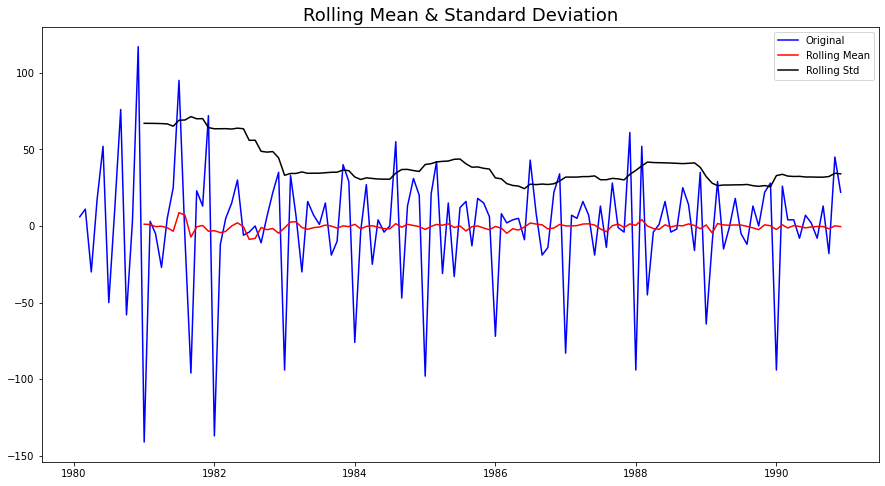

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [675]:
test_stationarity(train.diff().dropna())

#### After differentiation, It is observed that the  p-value (alpha) < 0.05. So, the series is now stationary.

## Question 6:  Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE. 


<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#0e92ea"> Answer 6 :

## ARIMA

In [676]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 4
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.


import itertools
p =  q = range(0, 4)
d=range(1, 2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))


Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [677]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [678]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830465377
ARIMA(0, 1, 2) - AIC:1276.8353734326238
ARIMA(0, 1, 3) - AIC:1278.0742615647382
ARIMA(1, 1, 0) - AIC:1319.348310580191
ARIMA(1, 1, 1) - AIC:1277.7757477262394
ARIMA(1, 1, 2) - AIC:1277.3592311591394
ARIMA(1, 1, 3) - AIC:1279.312645892578
ARIMA(2, 1, 0) - AIC:1300.6092611743957
ARIMA(2, 1, 1) - AIC:1279.0456894093104
ARIMA(2, 1, 2) - AIC:1279.298693936561
ARIMA(2, 1, 3) - AIC:1281.196226042348
ARIMA(3, 1, 0) - AIC:1299.4787391543048
ARIMA(3, 1, 1) - AIC:1279.6059627864802
ARIMA(3, 1, 2) - AIC:1280.969252344185
ARIMA(3, 1, 3) - AIC:1273.19410097781


In [679]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
15,"(3, 1, 3)",1273.194101
2,"(0, 1, 2)",1276.835373
6,"(1, 1, 2)",1277.359231
5,"(1, 1, 1)",1277.775748
3,"(0, 1, 3)",1278.074262
9,"(2, 1, 1)",1279.045689
10,"(2, 1, 2)",1279.298694
7,"(1, 1, 3)",1279.312646
13,"(3, 1, 1)",1279.605963
1,"(0, 1, 1)",1280.726183


In [680]:
## ARIMA(3,1,3) has the lowest AIC
auto_ARIMA = ARIMA(train, order=(3,1,3))

results_Arima = auto_ARIMA.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.355
Date:                Fri, 23 Apr 2021   AIC                           1273.194
Time:                        12:58:36   BIC                           1296.196
Sample:                    02-01-1980   HQIC                          1282.541
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4906      0.088     -5.549      0.000      -0.664      -0.317
ar.L1.D.Rose    -0.7244      0.086     -8.405      0.000      -0.893      -0.556
ar.L2.D.Rose    -0.7219      0.087     -8.33

In [681]:
test.shape

(55, 1)

In [682]:
test= test.astype(float)
final_hat_avg =test.copy()
predicted_auto_ARIMA = results_Arima.forecast(steps=len(test))

In [683]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test,predicted_auto_ARIMA [0],squared=False)
mape = MAPE(test['Rose'], predicted_auto_ARIMA[0])
print(rmse,mape)

15.99781411327278 26.15


In [684]:
resultsDf1 = pd.DataFrame({'RMSE': [rmse], 'MAPE' : [mape]}
                           ,index=['Auto ARIMA(3,1,3)'])

resultsDf1

,RMSE,MAPE
"Auto ARIMA(3,1,3)",15.997814,26.15


In [685]:
tempResultsDf = pd.DataFrame({'Method': 'Auto ARIMA(3,1,3)', 'RMSE': [rmse], 'MAPE' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,RMSE,MAPE
0,Simple Exponential Smoothing (alpha = 0.1),36.813611,63.93
0,Double Exponential Smoothing (alpha = 0.16),70.592305,120.31
0,"Double Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.35 )",16.337739,25.86
0,"Triple Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.4, Gamma = 0.26)",8.742542,11.92
0,Regression On Time,15.275000,22.85
0,Naive model,79.735000,145.17
0,Simple Average,53.478000,94.98
0,moving_avg_4_period,14.457000,19.50
0,moving_avg_6_period,14.569000,20.83
0,moving_avg_8_period,14.802000,21.02


## SARIMA

#### Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

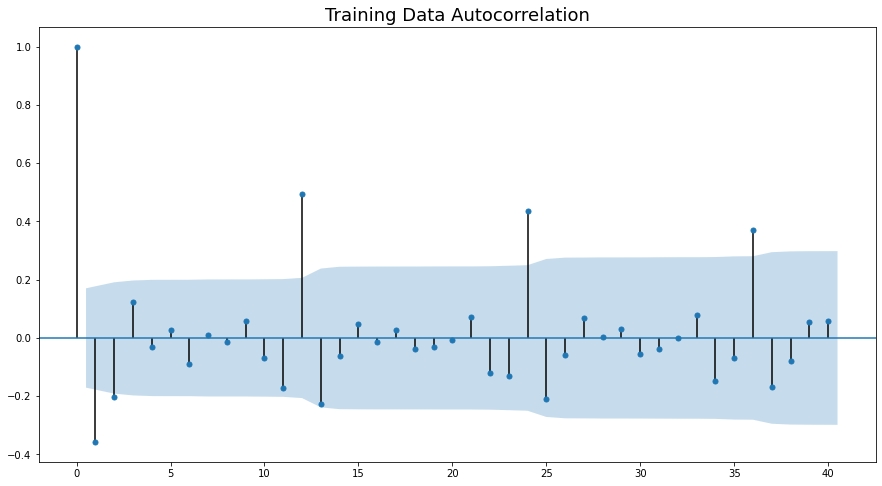

In [686]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop',lags=40);

#### We can see that the data has seasonality

In [687]:
### As the dataset has seasonality.. Let's build the model with SARIMA

SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
print(SARIMA_AIC)

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []


In [688]:
import itertools
p = q = range(0, 5)
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (0, 1, 4)(0, 0, 4, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 4)(0, 1, 4, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 4)(1, 0, 4, 12)
Model: (3, 1, 0)(1, 1, 0, 12)
Model: (3, 1, 1)(1, 1, 1, 12)
Model: (3, 1, 2)(1, 1, 2, 12)
Model: (3, 1, 3)(1, 1, 3, 12)
Model: (3, 1, 4)(1, 1, 4, 12)
Model: (4, 1, 0)(2, 0, 0, 12)
Model: (4, 1, 1)(2, 0, 1, 12)
Model: (4, 1, 2)(2, 0, 2, 12)
Model: (4, 1, 3)(2, 0, 3, 12)
Model: (4, 1, 4)(2, 0, 4, 12)


In [713]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207377
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380897
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4100.925910378537
SARIMA(0, 1, 0)x(0, 0, 4, 12) - AIC:763.9966104781176
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:965.5057301648358
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:845.8687014723042
SARIMA(0, 1, 0)x(0, 1, 3, 12) - AIC:1836.4941108176545
SARIMA(0, 1, 0)x(0, 1, 4, 12) - AIC:634.6998047538069
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869688688
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913640042145
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:nan
SARIMA(0, 1, 0)x(1, 0, 4, 12) - AIC:737.7650771585829
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:982.3269589658809
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:975.33753836844
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:847.7332182644159
SARIMA(0, 1, 0)x(1, 1, 3, 12) - AIC:566

SARIMA(0, 1, 3)x(0, 1, 0, 12) - AIC:1088.3764719132366
SARIMA(0, 1, 3)x(0, 1, 1, 12) - AIC:897.1317876301831
SARIMA(0, 1, 3)x(0, 1, 2, 12) - AIC:778.4427568006132
SARIMA(0, 1, 3)x(0, 1, 3, 12) - AIC:3893.4731320168908
SARIMA(0, 1, 3)x(0, 1, 4, 12) - AIC:576.2379803674328
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1089.205136836619
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1034.8411218232955
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:896.8362529982323
SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:nan
SARIMA(0, 1, 3)x(1, 0, 4, 12) - AIC:675.9164332327827
SARIMA(0, 1, 3)x(1, 1, 0, 12) - AIC:943.504308869864
SARIMA(0, 1, 3)x(1, 1, 1, 12) - AIC:904.9319970285853
SARIMA(0, 1, 3)x(1, 1, 2, 12) - AIC:780.2386080139576
SARIMA(0, 1, 3)x(1, 1, 3, 12) - AIC:nan
SARIMA(0, 1, 3)x(1, 1, 4, 12) - AIC:573.8314200622357
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:914.9477112522968
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:916.0631008201947
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:880.5509806720403
SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:2467.3827094267654

SARIMA(1, 1, 1)x(0, 1, 4, 12) - AIC:589.4626968893975
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937962968398
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.718054674828
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549420364044
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:nan
SARIMA(1, 1, 1)x(1, 0, 4, 12) - AIC:689.1226461119581
SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:933.297421694131
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:927.2920639330961
SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:794.1929706817664
SARIMA(1, 1, 1)x(1, 1, 3, 12) - AIC:nan
SARIMA(1, 1, 1)x(1, 1, 4, 12) - AIC:586.3764767226794
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060678133
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867451368
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.6725796178101
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:2204.6716285883717
SARIMA(1, 1, 1)x(2, 0, 4, 12) - AIC:687.7083443894387
SARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:799.9474255021942
SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:791.906543484751
SARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:784.1103477053271
SA

SARIMA(1, 1, 4)x(1, 0, 3, 12) - AIC:nan
SARIMA(1, 1, 4)x(1, 0, 4, 12) - AIC:671.893440886762
SARIMA(1, 1, 4)x(1, 1, 0, 12) - AIC:934.8492507918971
SARIMA(1, 1, 4)x(1, 1, 1, 12) - AIC:897.2502711721545
SARIMA(1, 1, 4)x(1, 1, 2, 12) - AIC:772.0967485297483
SARIMA(1, 1, 4)x(1, 1, 3, 12) - AIC:nan
SARIMA(1, 1, 4)x(1, 1, 4, 12) - AIC:567.9507640774981
SARIMA(1, 1, 4)x(2, 0, 0, 12) - AIC:926.7205662919157
SARIMA(1, 1, 4)x(2, 0, 1, 12) - AIC:915.6226434252709
SARIMA(1, 1, 4)x(2, 0, 2, 12) - AIC:885.5747093177546
SARIMA(1, 1, 4)x(2, 0, 3, 12) - AIC:1715.125967348792
SARIMA(1, 1, 4)x(2, 0, 4, 12) - AIC:672.1286224622037
SARIMA(1, 1, 4)x(2, 1, 0, 12) - AIC:804.4490820879761
SARIMA(1, 1, 4)x(2, 1, 1, 12) - AIC:795.9240851959507
SARIMA(1, 1, 4)x(2, 1, 2, 12) - AIC:762.2382139117718
SARIMA(1, 1, 4)x(2, 1, 3, 12) - AIC:5364.602103660259
SARIMA(1, 1, 4)x(2, 1, 4, 12) - AIC:562.1050603874592
SARIMA(1, 1, 4)x(3, 0, 0, 12) - AIC:794.6512700840899
SARIMA(1, 1, 4)x(3, 0, 1, 12) - AIC:795.8667952523473
SAR

SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:786.0202736370803
SARIMA(2, 1, 2)x(1, 1, 3, 12) - AIC:nan
SARIMA(2, 1, 2)x(1, 1, 4, 12) - AIC:582.5135040251273
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.346497794619
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.378248818123
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6688477890821
SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:855.8811795448826
SARIMA(2, 1, 2)x(2, 0, 4, 12) - AIC:684.7595691655026
SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:794.7799446009974
SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:783.7036511326176
SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:778.9226332136141
SARIMA(2, 1, 2)x(2, 1, 3, 12) - AIC:5555.164295301727
SARIMA(2, 1, 2)x(2, 1, 4, 12) - AIC:574.5242086952293
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:785.1199716759121
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:786.9410030371433
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:786.9641177483448
SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:2074.4596787526175
SARIMA(2, 1, 2)x(3, 0, 4, 12) - AIC:684.8970474404206
SARIMA(2, 1, 2)x(3, 1, 0, 12) - AIC:696.866

SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.0620713783355
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.0438816556947
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:2646.265270468892
SARIMA(3, 1, 0)x(2, 0, 4, 12) - AIC:714.6729475976473
SARIMA(3, 1, 0)x(2, 1, 0, 12) - AIC:803.7674514714101
SARIMA(3, 1, 0)x(2, 1, 1, 12) - AIC:794.8634032491444
SARIMA(3, 1, 0)x(2, 1, 2, 12) - AIC:796.6369790493305
SARIMA(3, 1, 0)x(2, 1, 3, 12) - AIC:5483.957410824585
SARIMA(3, 1, 0)x(2, 1, 4, 12) - AIC:601.2928789377926
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:796.0564701585537
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410169064832
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.6677011239962
SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3286.44040365201
SARIMA(3, 1, 0)x(3, 0, 4, 12) - AIC:716.3535311535819
SARIMA(3, 1, 0)x(3, 1, 0, 12) - AIC:704.8546570159015
SARIMA(3, 1, 0)x(3, 1, 1, 12) - AIC:696.8642298022094
SARIMA(3, 1, 0)x(3, 1, 2, 12) - AIC:699.0912732030183
SARIMA(3, 1, 0)x(3, 1, 3, 12) - AIC:5297.53471808092
SARIMA(3, 1, 0)x(3, 1, 4, 12) 

SARIMA(3, 1, 3)x(2, 1, 0, 12) - AIC:785.3703293279767
SARIMA(3, 1, 3)x(2, 1, 1, 12) - AIC:777.6826082310197
SARIMA(3, 1, 3)x(2, 1, 2, 12) - AIC:770.2581980981719
SARIMA(3, 1, 3)x(2, 1, 3, 12) - AIC:5320.697446930787
SARIMA(3, 1, 3)x(2, 1, 4, 12) - AIC:570.1212583805687
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:775.5610185979901
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:776.369038929778
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:778.2316250524696
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3713.9254190160573
SARIMA(3, 1, 3)x(3, 0, 4, 12) - AIC:679.2070584161726
SARIMA(3, 1, 3)x(3, 1, 0, 12) - AIC:689.5052770663982
SARIMA(3, 1, 3)x(3, 1, 1, 12) - AIC:682.8786206891344
SARIMA(3, 1, 3)x(3, 1, 2, 12) - AIC:688.8565650700959
SARIMA(3, 1, 3)x(3, 1, 3, 12) - AIC:5316.2669965490095
SARIMA(3, 1, 3)x(3, 1, 4, 12) - AIC:572.1009194413479
SARIMA(3, 1, 3)x(4, 0, 0, 12) - AIC:682.8677726343066
SARIMA(3, 1, 3)x(4, 0, 1, 12) - AIC:685.2224673338684
SARIMA(3, 1, 3)x(4, 0, 2, 12) - AIC:684.6845493840864
SARIMA(3, 1, 3)x(4, 0, 3, 1

SARIMA(4, 1, 1)x(2, 1, 4, 12) - AIC:586.2435817177541
SARIMA(4, 1, 1)x(3, 0, 0, 12) - AIC:769.2567893806072
SARIMA(4, 1, 1)x(3, 0, 1, 12) - AIC:766.6969177115064
SARIMA(4, 1, 1)x(3, 0, 2, 12) - AIC:765.7476008315426
SARIMA(4, 1, 1)x(3, 0, 3, 12) - AIC:2667.7921226230083
SARIMA(4, 1, 1)x(3, 0, 4, 12) - AIC:691.1505418540424
SARIMA(4, 1, 1)x(3, 1, 0, 12) - AIC:682.14518398301
SARIMA(4, 1, 1)x(3, 1, 1, 12) - AIC:674.9184154071735
SARIMA(4, 1, 1)x(3, 1, 2, 12) - AIC:676.1699779663551
SARIMA(4, 1, 1)x(3, 1, 3, 12) - AIC:nan
SARIMA(4, 1, 1)x(3, 1, 4, 12) - AIC:587.7409209302359
SARIMA(4, 1, 1)x(4, 0, 0, 12) - AIC:677.9614330162282
SARIMA(4, 1, 1)x(4, 0, 1, 12) - AIC:676.8230699668403
SARIMA(4, 1, 1)x(4, 0, 2, 12) - AIC:677.9137543933034
SARIMA(4, 1, 1)x(4, 0, 3, 12) - AIC:2311.3671905394463
SARIMA(4, 1, 1)x(4, 0, 4, 12) - AIC:679.6969515258087
SARIMA(4, 1, 1)x(4, 1, 0, 12) - AIC:579.0021428033132
SARIMA(4, 1, 1)x(4, 1, 1, 12) - AIC:579.7295751282596
SARIMA(4, 1, 1)x(4, 1, 2, 12) - AIC:581.16

SARIMA(4, 1, 4)x(3, 0, 4, 12) - AIC:672.983817886757
SARIMA(4, 1, 4)x(3, 1, 0, 12) - AIC:678.1863355534807
SARIMA(4, 1, 4)x(3, 1, 1, 12) - AIC:669.7116560088795
SARIMA(4, 1, 4)x(3, 1, 2, 12) - AIC:671.1676152212049
SARIMA(4, 1, 4)x(3, 1, 3, 12) - AIC:5406.452076430669
SARIMA(4, 1, 4)x(3, 1, 4, 12) - AIC:563.2248821243675
SARIMA(4, 1, 4)x(4, 0, 0, 12) - AIC:677.937715219482
SARIMA(4, 1, 4)x(4, 0, 1, 12) - AIC:677.2354119766175
SARIMA(4, 1, 4)x(4, 0, 2, 12) - AIC:673.1577085866384
SARIMA(4, 1, 4)x(4, 0, 3, 12) - AIC:1923.0482453827374
SARIMA(4, 1, 4)x(4, 0, 4, 12) - AIC:672.665704665271
SARIMA(4, 1, 4)x(4, 1, 0, 12) - AIC:573.4929335513561
SARIMA(4, 1, 4)x(4, 1, 1, 12) - AIC:574.0523930774053
SARIMA(4, 1, 4)x(4, 1, 2, 12) - AIC:576.2921723290716
SARIMA(4, 1, 4)x(4, 1, 3, 12) - AIC:4572.148451484422
SARIMA(4, 1, 4)x(4, 1, 4, 12) - AIC:559.5577440227145


In [714]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

,param,seasonal,AIC
1229,"(4, 1, 4)","(2, 1, 4, 12)",556.796465
1249,"(4, 1, 4)","(4, 1, 4, 12)",559.557744
729,"(2, 1, 4)","(2, 1, 4, 12)",559.945748
999,"(3, 1, 4)","(4, 1, 4, 12)",561.069540
479,"(1, 1, 4)","(2, 1, 4, 12)",562.105060


In [690]:
## SARIMA
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(4,1,4),
                                seasonal_order=(2, 1, 4, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(4, 1, 4)x(2, 1, 4, 12)   Log Likelihood                -536.910
Date:                            Fri, 23 Apr 2021   AIC                           1103.821
Time:                                    13:01:09   BIC                           1145.508
Sample:                                01-01-1980   HQIC                          1120.749
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6176      0.262      2.361      0.018       0.105       1.130
ar.L2         -0.2679      0.311   

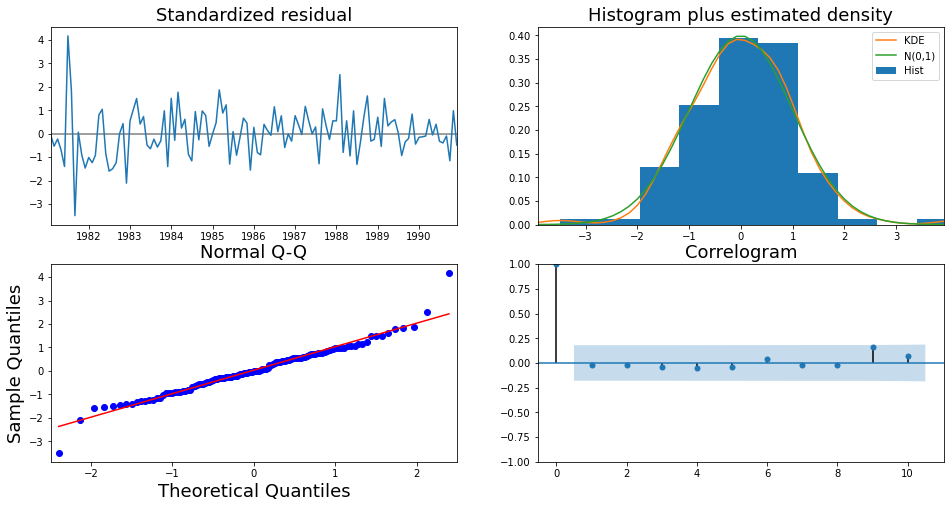

In [691]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

In [692]:
test= test.astype(float)
final_hat_avg =test.copy()
pred_Sarima = results_SARIMA.get_forecast(steps=len(test))
pred_Sarima.predicted_mean

1991-01-01    33.522953 
1991-02-01    59.247171 
1991-03-01    57.430953 
1991-04-01    56.920111 
1991-05-01    59.053362 
1991-06-01    69.905676 
1991-07-01    65.580788 
1991-08-01    68.229860 
1991-09-01    77.700028 
1991-10-01    73.519980 
1991-11-01    93.805244 
1991-12-01    132.198902
1992-01-01    36.302143 
1992-02-01    47.809643 
1992-03-01    58.860140 
1992-04-01    49.951755 
1992-05-01    55.722199 
1992-06-01    62.964843 
1992-07-01    71.480546 
1992-08-01    67.664318 
1992-09-01    65.404439 
1992-10-01    62.772962 
1992-11-01    86.279125 
1992-12-01    124.780725
1993-01-01    28.211176 
1993-02-01    44.732611 
1993-03-01    44.607875 
1993-04-01    39.109862 
1993-05-01    43.725219 
1993-06-01    54.325164 
1993-07-01    56.266128 
1993-08-01    61.528575 
1993-09-01    65.857080 
1993-10-01    56.832096 
1993-11-01    78.340947 
1993-12-01    118.182975
1994-01-01    22.099355 
1994-02-01    35.978176 
1994-03-01    45.953543 
1994-04-01    35.068115 


In [693]:
pred_Sarima.summary_frame()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,33.522953,20.560222,-6.774341,73.820248
1991-02-01,59.247171,21.355569,17.391026,101.103317
1991-03-01,57.430953,21.379665,15.527579,99.334327
1991-04-01,56.920111,21.769069,14.253520,99.586701
1991-05-01,59.053362,21.877992,16.173286,101.933437
1991-06-01,69.905676,22.091020,26.608072,113.203280
1991-07-01,65.580788,22.134394,22.198173,108.963403
1991-08-01,68.229860,22.162547,24.792066,111.667655
1991-09-01,77.700028,22.181420,34.225243,121.174814
1991-10-01,73.519980,22.252795,29.905305,117.134656


In [694]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test ,pred_Sarima.predicted_mean))
mape = MAPE(test['Rose'], pred_Sarima.predicted_mean)
print(rmse,mape)


14.719733081762653 20.2


In [695]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE' : [mape]}
                           ,index=['Auto SARIMA(4,1,4)(2, 1, 4, 12)'])

resultsDf1 = pd.concat([resultsDf1, temp_resultsDf])
resultsDf1

,RMSE,MAPE
"Auto ARIMA(3,1,3)",15.997814,26.15
"Auto SARIMA(4,1,4)(2, 1, 4, 12)",14.719733,20.20


In [697]:
tempResultsDf = pd.DataFrame({'Method': 'Auto SARIMA(4,1,4)(2, 1, 4, 12)', 'RMSE': [rmse],'MAPE' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,RMSE,MAPE
0,Simple Exponential Smoothing (alpha = 0.1),36.813611,63.93
0,Double Exponential Smoothing (alpha = 0.16),70.592305,120.31
0,"Double Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.35 )",16.337739,25.86
0,"Triple Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.4, Gamma = 0.26)",8.742542,11.92
0,Regression On Time,15.275000,22.85
0,Naive model,79.735000,145.17
0,Simple Average,53.478000,94.98
0,moving_avg_4_period,14.457000,19.50
0,moving_avg_6_period,14.569000,20.83
0,moving_avg_8_period,14.802000,21.02


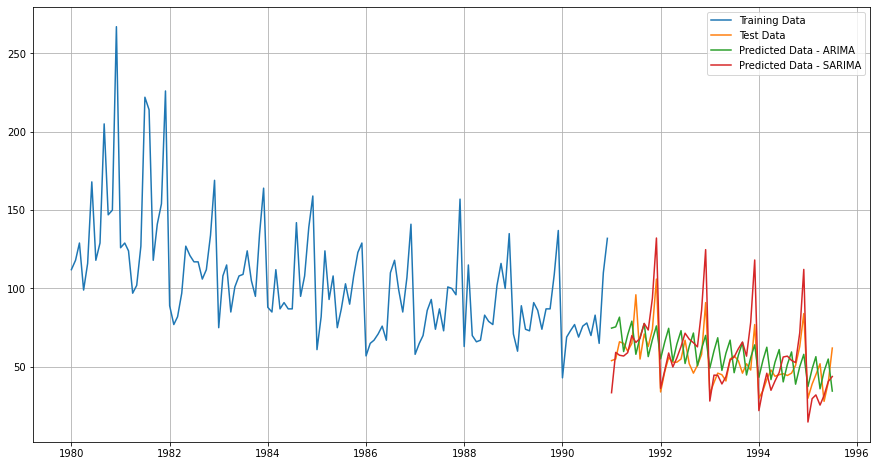

In [698]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_auto_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test.index,pred_Sarima.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

## Question 7: Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#0e92ea"> Answer 7 :

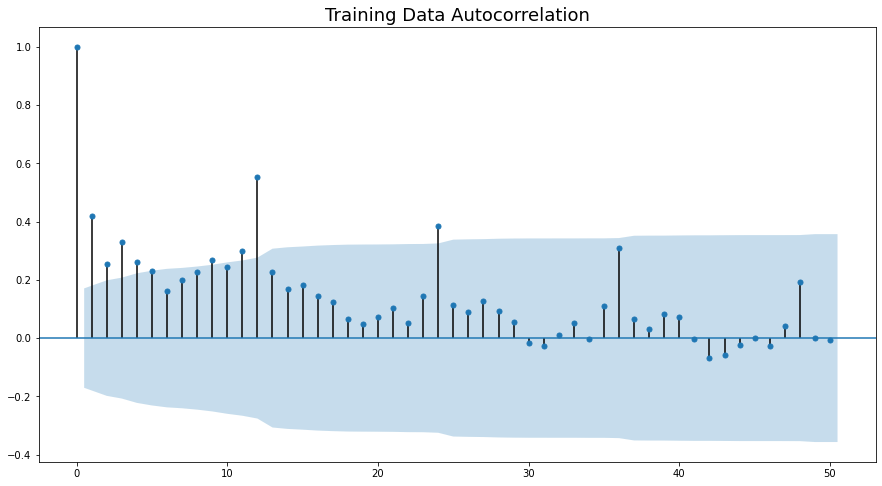

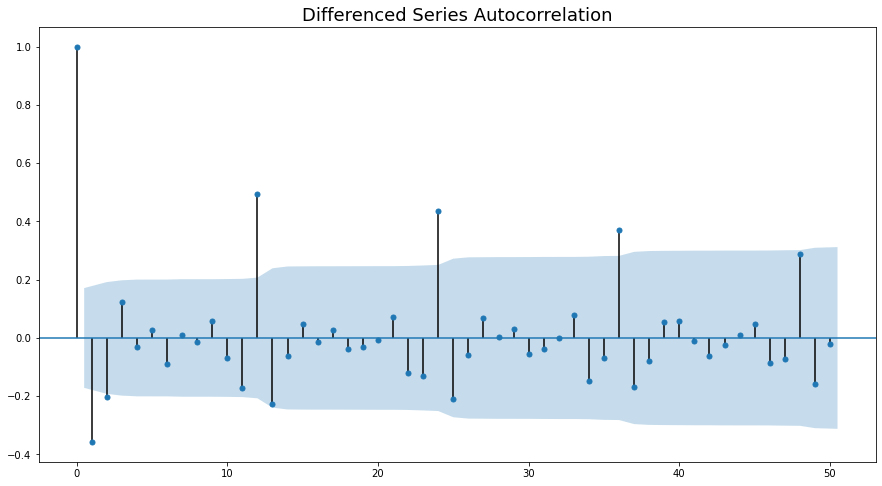

In [699]:
plot_acf(train['Rose'],lags=50,title='Training Data Autocorrelation',missing='drop')
plot_acf(train['Rose'].diff().dropna(),lags=50,title='Differenced Series Autocorrelation')
plt.show()


#plot_pacf(train['Sparkling'].diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')



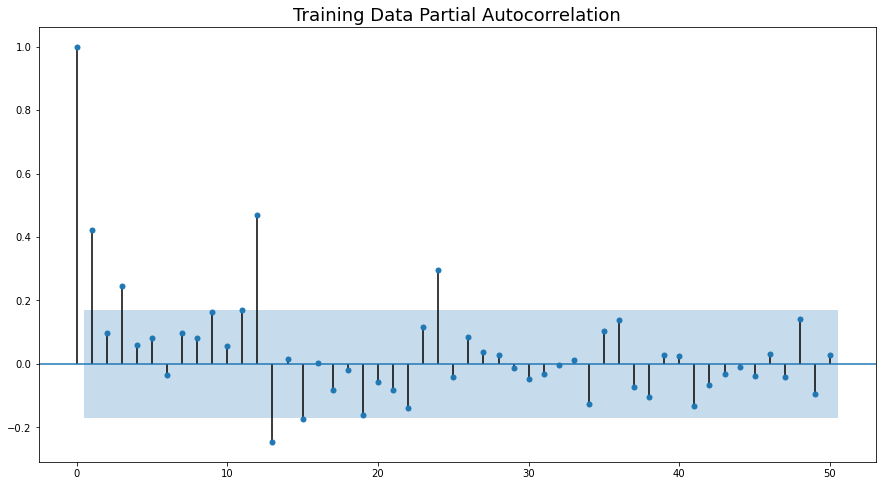

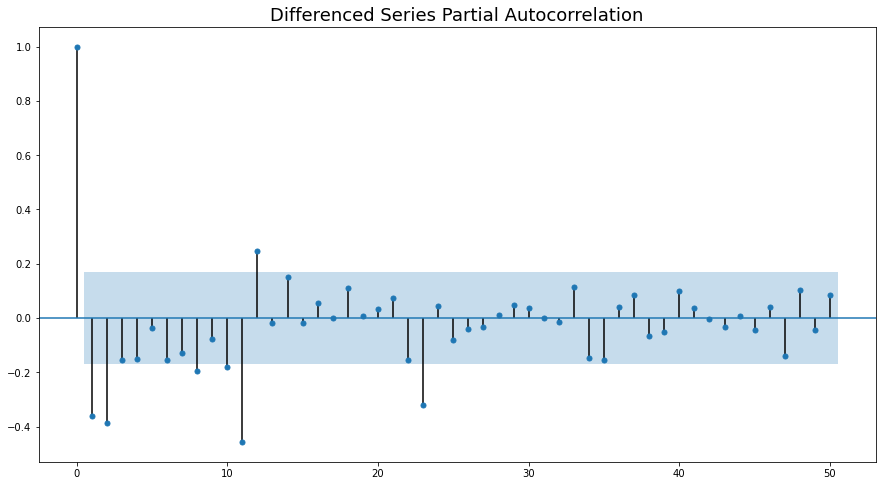

In [700]:
plot_pacf(train['Rose'],title='Training Data Partial Autocorrelation',lags=50)
plot_pacf(train['Rose'].diff().dropna(),lags=50,title='Differenced Series Partial Autocorrelation')
plt.show()

## Manual ARIMA Model with Order (2,1,2)

In [701]:
Manu_ARIMA = ARIMA(train, order=(2,1,2))

results_Arima_Manu = Manu_ARIMA.fit()

print(results_Arima_Manu.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Fri, 23 Apr 2021   AIC                           1279.299
Time:                        13:07:28   BIC                           1296.550
Sample:                    02-01-1980   HQIC                          1286.309
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.Rose    -0.4383      0.218     -2.015      0.044      -0.865      -0.012
ar.L2.D.Rose     0.0269      0.109      0.24

In [702]:
test1 = test.astype(float)
final_hat_avg =test1.copy()
predicted_Manu_ARIMA = results_Arima_Manu.forecast(steps=len(test))

In [703]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test,predicted_Manu_ARIMA [0],squared=False)
mape = MAPE(test['Rose'], predicted_Manu_ARIMA[0])
print(rmse,mape)

15.360306675394348 22.8


In [704]:
resultsDf2 = pd.DataFrame({'RMSE': [rmse], 'MAPE' : [mape]}
                           ,index=['Manual ARIMA(2,1,2)'])

resultsDf2

,RMSE,MAPE
"Manual ARIMA(2,1,2)",15.360307,22.8


## Manual SARIMA Model with parameters 

In [705]:
mod = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2, 0, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(maxiter=100000)
print(results.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                       Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, [1, 2, 3], 12)   Log Likelihood                -417.941
Date:                                    Fri, 23 Apr 2021   AIC                            855.881
Time:                                            13:09:32   BIC                            881.099
Sample:                                        01-01-1980   HQIC                           866.059
                                             - 12-01-1990                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6130   1.58e-19  -3.89e+18      0

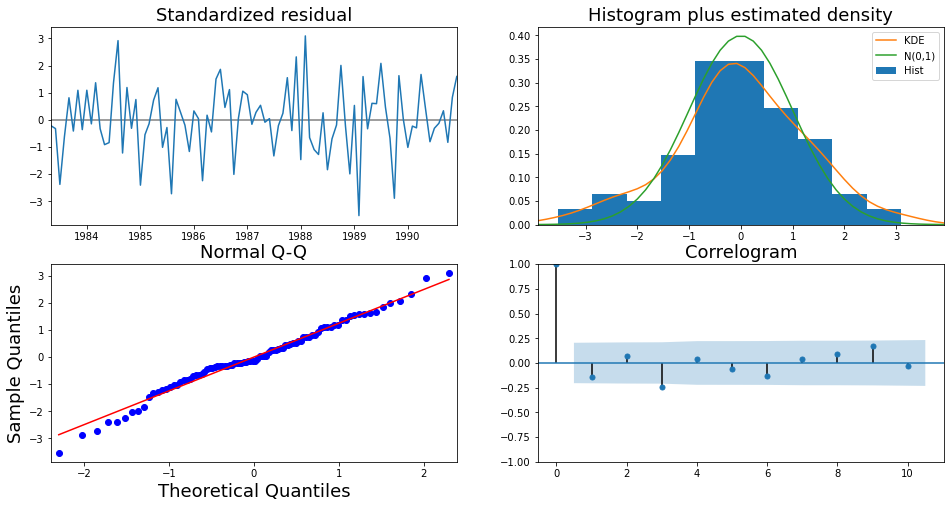

In [706]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [707]:
pred = results.get_forecast(steps=len(test))
pred.predicted_mean

1991-01-01    50.966911 
1991-02-01    26.414373 
1991-03-01    73.424495 
1991-04-01    84.664854 
1991-05-01    74.841236 
1991-06-01    77.094028 
1991-07-01    90.252714 
1991-08-01    78.072743 
1991-09-01    79.506945 
1991-10-01    42.767872 
1991-11-01    111.001518
1991-12-01    144.428972
1992-01-01    41.741692 
1992-02-01    56.022902 
1992-03-01    69.460332 
1992-04-01    90.842611 
1992-05-01    79.865249 
1992-06-01    70.489863 
1992-07-01    78.182452 
1992-08-01    72.116948 
1992-09-01    83.176160 
1992-10-01    55.137643 
1992-11-01    107.602731
1992-12-01    140.162019
1993-01-01    59.184018 
1993-02-01    48.310007 
1993-03-01    78.159451 
1993-04-01    88.832913 
1993-05-01    81.190748 
1993-06-01    79.880913 
1993-07-01    88.986673 
1993-08-01    80.861390 
1993-09-01    84.406039 
1993-10-01    57.643754 
1993-11-01    107.422117
1993-12-01    133.497583
1994-01-01    58.100248 
1994-02-01    63.100766 
1994-03-01    77.738190 
1994-04-01    91.904916 


In [708]:
rmse = mean_squared_error(test['Rose'],pred.predicted_mean,squared=False)
print(rmse)

32.45266825183638


In [709]:
temp_resultsDf1 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Manual SARIMA(2, 1, 2)(2, 0, 3, 12)'])


resultsDf2 = pd.concat([resultsDf2,temp_resultsDf1])

resultsDf2

,RMSE,MAPE
"Manual ARIMA(2,1,2)",15.360307,22.8
"Manual SARIMA(2, 1, 2)(2, 0, 3, 12)",32.452668,NaN


## Question 8: Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#0e92ea"> Answer 8 :

In [710]:
tempResultsDf = pd.DataFrame({'Method': 'Non-auto SARIMA(2, 1, 2)(2, 0, 3, 12)', 'RMSE': [rmse]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,RMSE,MAPE
0,Simple Exponential Smoothing (alpha = 0.1),36.813611,63.93
0,Double Exponential Smoothing (alpha = 0.16),70.592305,120.31
0,"Double Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.35 )",16.337739,25.86
0,"Triple Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.4, Gamma = 0.26)",8.742542,11.92
0,Regression On Time,15.275000,22.85
0,Naive model,79.735000,145.17
0,Simple Average,53.478000,94.98
0,moving_avg_4_period,14.457000,19.50
0,moving_avg_6_period,14.569000,20.83
0,moving_avg_8_period,14.802000,21.02


## Question 9: Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#0e92ea"> Answer 9 :

## From the above table, it is seen that Optimized Triple Exponential Smoothing has the minimum RMSE. So, we will consider this model for future forecasting.

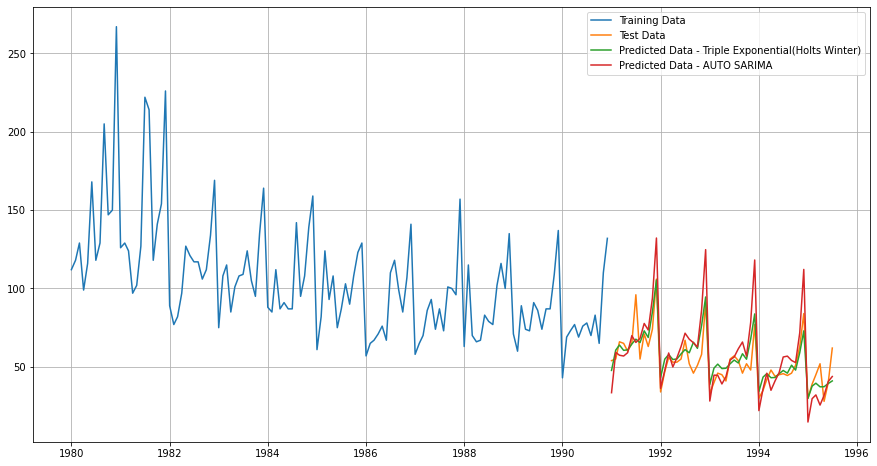

In [712]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predict['TES'],label='Predicted Data - Triple Exponential(Holts Winter)')
plt.plot(test.index,pred_Sarima.predicted_mean,label='Predicted Data - AUTO SARIMA')
plt.legend(loc='best')
plt.grid();

### Building Forecast for 12 months

## Holt-Winters Method - Triple Exponential - Multiplicative Model - OPTIMIZED

In [572]:
model_TES_full = ExponentialSmoothing(df['Rose'],seasonal_periods = 12, trend='additive',seasonal='multiplicative')

In [573]:
model_TES_full_i_j_k = model_TES_full.fit(smoothing_level=0.05,smoothing_slope=0.4,smoothing_seasonal=0.26,optimized=False,use_brute=True)

In [574]:
prediction_1 = model_TES_full_i_j_k.forecast(steps=12)

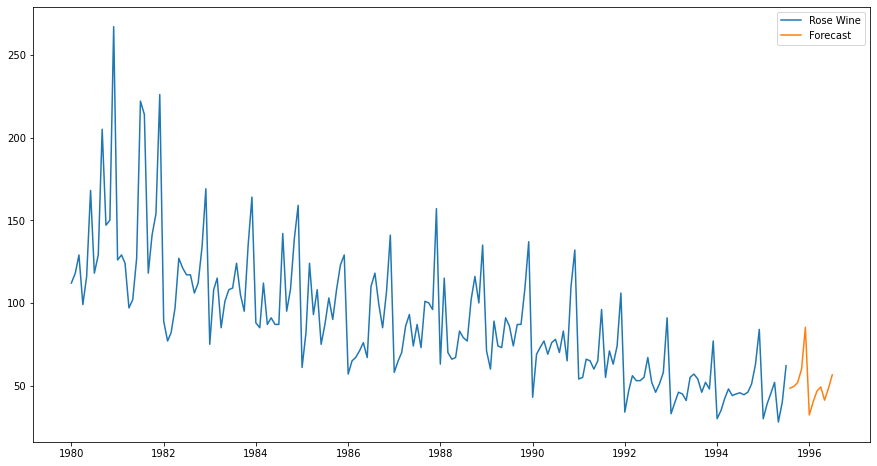

In [575]:
plt.plot(df['Rose'], label='Rose Wine')
plt.plot(prediction_1, label='Forecast')
plt.legend(loc='best')
plt.show()

In [576]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_full_i_j_k.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_CI': prediction_1 + 1.96*np.std(model_TES_full_i_j_k.resid,ddof=1)})
pred_1_df

,lower_CI,prediction,upper_CI
1995-08-01,6.843868,48.454117,90.064367
1995-09-01,7.902506,49.512755,91.123005
1995-10-01,10.294281,51.904531,93.514780
1995-11-01,18.489084,60.099334,101.709584
1995-12-01,43.638816,85.249066,126.859316
1996-01-01,-9.328095,32.282155,73.892404
1996-02-01,-1.358224,40.252026,81.862276
1996-03-01,4.989493,46.599743,88.209993
1996-04-01,7.587595,49.197845,90.808094
1996-05-01,-0.411590,41.198659,82.808909


Text(0.5, 1.0, 'Triple Exponential Smoothing')

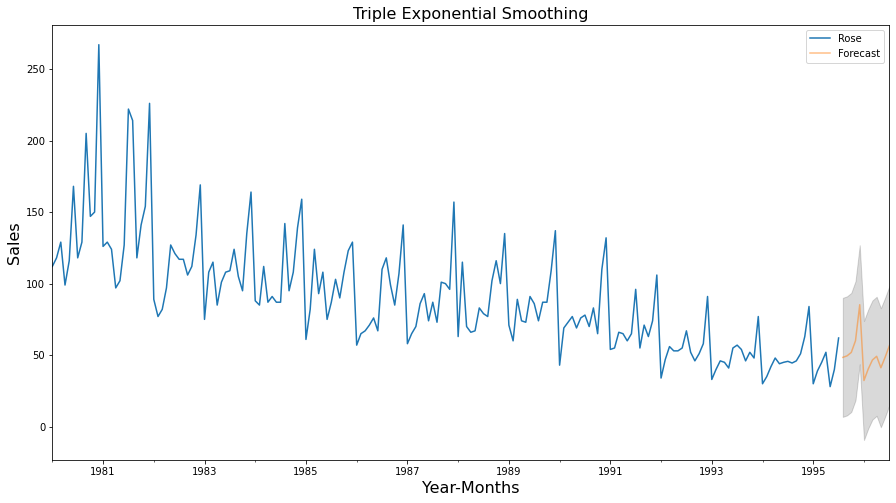

In [577]:
# plot the forecast along with the confidence band

axis = df.plot(label='Rose Wine', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_CI'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
#plt.legend(fontsize="x-large")
#plt.grid()
plt.title('Triple Exponential Smoothing')

## AUTO SARIMA (4,1,4)(2,1,4,12)

In [578]:
## To get the real forecast for 12 months, we will rerun the model on the complete dataset

final_1 = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(4,1,4),
                                seasonal_order=(2, 1, 4, 12),
                                enforce_invertibility=True,
                                enforce_stationarity=False,)
results = final_1.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(4, 1, 4)x(2, 1, 4, 12)   Log Likelihood                -467.895
Date:                            Fri, 23 Apr 2021   AIC                            965.791
Time:                                    12:39:24   BIC                           1007.728
Sample:                                01-01-1980   HQIC                           982.823
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3365      0.121     -2.785      0.005      -0.573      -0.100
ar.L2         -0.3219      0.151   

In [579]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1995-07-01'), dynamic=True, full_results=True)

In [580]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [581]:
pred95 = results.get_forecast(steps=12, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [582]:
pred_ci_95

,lower Rose,upper Rose
1995-08-01,16.233500,58.600711
1995-09-01,20.707351,63.489071
1995-10-01,30.121007,73.116887
1995-11-01,33.893279,79.668377
1995-12-01,52.816692,98.643899
1996-01-01,-8.410642,37.729084
1996-02-01,2.609010,48.996833
1996-03-01,15.916812,62.904352
1996-04-01,14.897087,62.041360
1996-05-01,2.645548,49.801744


In [583]:
pred_ci_95['Prediction']=pred95.predicted_mean

In [584]:
pred_ci_95

,lower Rose,upper Rose,Prediction
1995-08-01,16.233500,58.600711,37.417106
1995-09-01,20.707351,63.489071,42.098211
1995-10-01,30.121007,73.116887,51.618947
1995-11-01,33.893279,79.668377,56.780828
1995-12-01,52.816692,98.643899,75.730296
1996-01-01,-8.410642,37.729084,14.659221
1996-02-01,2.609010,48.996833,25.802922
1996-03-01,15.916812,62.904352,39.410582
1996-04-01,14.897087,62.041360,38.469223
1996-05-01,2.645548,49.801744,26.223646


In [585]:
forecast_fullmodel_sarimax = pred95.predicted_mean

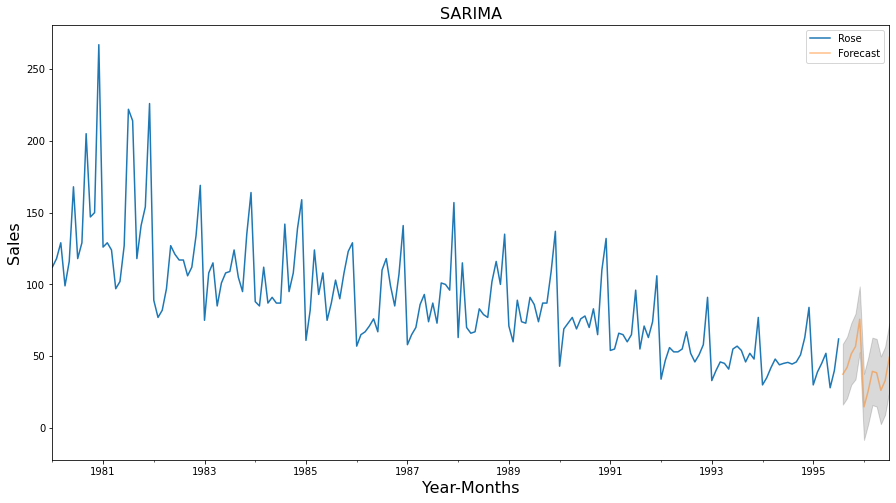

In [586]:
# plot the forecast along with the confidence band
axis = df.plot(label='Rose', figsize=(15, 8))
forecast_fullmodel_sarimax.plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(forecast_fullmodel_sarimax.index, pred_ci_95['lower Rose'], pred_ci_95['upper Rose'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.title('SARIMA')
plt.show()
